In [1]:
from pycaret.regression import *
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('../../data/MiFit/Export data/ACTIVITY/ACTIVITY_1704203167901.csv')
df1 = pd.read_csv('../../data/MiFit/Export data 170420/ACTIVITY/ACTIVITY_1704202151453.csv')
df = pd.concat([df, df1]) 
df = df.reset_index(drop=True)

# drop date
df = df.drop(columns=['date'])

df.head()

steps  distance  runDistance  calories
0   1901      1279          179        44
1    995       669          122        24
2   7950      5749          263       182
3   1419       955          172        36
4   1367       920          109        33

In [4]:
setup(df, target="calories", verbose=False, session_id=42, html=False)
setup_df = pull()
best_model = compare_models()
compare_df = pull()

                                    Model      MAE         MSE      RMSE  \
lr                      Linear Regression   4.7829     45.0952    6.6513   
ridge                    Ridge Regression   4.7829     45.0952    6.6513   
llar         Lasso Least Angle Regression   4.7837     45.0909    6.6511   
br                         Bayesian Ridge   4.7844     45.0890    6.6511   
lasso                    Lasso Regression   4.9302     47.7252    6.8417   
en                            Elastic Net   4.9296     47.7112    6.8408   
huber                     Huber Regressor   4.7640     48.5392    6.8969   
et                  Extra Trees Regressor   5.5507     77.8235    8.6873   
catboost               CatBoost Regressor   5.6985     85.5234    8.9096   
gbr           Gradient Boosting Regressor   5.7667     81.8716    8.8728   
rf                Random Forest Regressor   5.7330     82.1203    8.9179   
knn                 K Neighbors Regressor   5.9197     95.4778    9.4639   
xgboost     

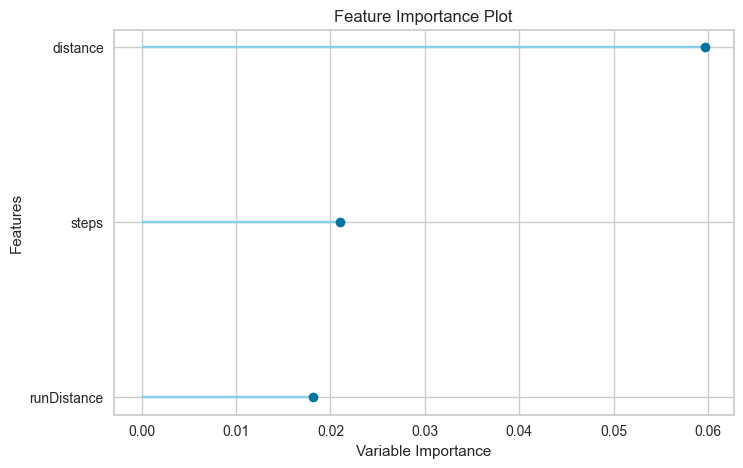

In [5]:
plot_model(best_model, plot='feature')

In [4]:
lr = create_model('xgboost')
params = lr.get_params()

In [1]:
from pycaret.classification import *
from pycaret.datasets import get_data
import pandas as pd

In [19]:
df = get_data('diabetes')
df.describe()

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /pycaret/datasets/main/data/common/diabetes.csv (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x29db80fa0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))

In [2]:
df = pd.read_csv('../../data/aw_fb/aw_fb_data.csv')
df = df.drop(['Unnamed: 0', 'X1'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   int64  
 1   gender                6264 non-null   int64  
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   hear_rate             6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_setps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  intensity_karvonen    6264 non-null   float64
 14  sd_norm_heart         6264 non-null   float64
 15  steps_times_distance 

In [8]:
# df = get_data('diabetes')÷
# group by last column
train_df = df.groupby(df.columns[-1]).head(2)
# drop train_df from df
# df = df.drop(train_df.index)
train_df

Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   
4                                40                                35   

   2-Hour serum insulin (mu U/ml)  \
0                               0   
1                               0   
2                               0   
3                              94   
4                             168   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                            33.6                       0.627   
1                                            26.6                       0.351   
2                                            23.3                       0.672   
3                                            28.1                       0.167   
4                                            43.1                       2.288   

   Age (years)  Class variable  
0           50               1  
1           31               0  
2           32               1  
3           21               0  
4           33               1

Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   

   2-Hour serum insulin (mu U/ml)  \
0                               0   
1                               0   
2                               0   
3                              94   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                            33.6                       0.627   
1                                            26.6                       0.351   
2                                            23.3                       0.672   
3                                            28.1                       0.167   

   Age (years)  Class variable  
0           50               1  
1           31               0  
2           32               1  
3           21               0

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_aw['activity'] = le.fit_transform(df_aw['activity'])
df_fb['activity'] = le.fit_transform(df_fb['activity'])

In [23]:
df_aw

age  gender  height  weight       steps   hear_rate   calories  \
0      20       1   168.0    65.4   10.771429   78.531302   0.344533   
1      20       1   168.0    65.4   11.475325   78.453390   3.287625   
2      20       1   168.0    65.4   12.179221   78.540825   9.484000   
3      20       1   168.0    65.4   12.883117   78.628260  10.154556   
4      20       1   168.0    65.4   13.587013   78.715695  10.825111   
...   ...     ...     ...     ...         ...         ...        ...   
3651   46       0   157.5    71.4  163.000000  157.250000   0.701500   
3652   46       0   157.5    71.4    6.666667  157.307692   0.701500   
3653   46       0   157.5    71.4    6.750000  156.250000   0.732000   
3654   46       0   157.5    71.4    6.791667  158.090909   0.612500   
3655   46       0   157.5    71.4    6.750000  157.230769   0.671000   

      distance  entropy_heart  entropy_setps  resting_heart  corr_heart_steps  \
0     0.008327       6.221612       6.116349      59.000000          1.000000   
1     0.008896       6.221612       6.116349      59.000000          1.000000   
2     0.009466       6.221612       6.116349      59.000000          1.000000   
3     0.010035       6.221612       6.116349      59.000000          1.000000   
4     0.010605       6.221612       6.116349      59.000000          0.982816   
...        ...            ...            ...            ...               ...   
3651  0.075200       6.162427       5.655310      79.421795          1.000000   
3652  0.075475       6.162427       5.655310      79.421795          1.000000   
3653  0.075695       6.162427       5.655310      79.421795          1.000000   
3654  0.077270       6.162427       5.655310      79.421795          1.000000   
3655  0.075965       6.162427       5.655310      79.421795          1.000000   

      norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
0      19.531302            0.138520       1.000000              0.089692   
1      19.453390            0.137967       1.000000              0.102088   
2      19.540825            0.138587       1.000000              0.115287   
3      19.628260            0.139208       1.000000              0.129286   
4      19.715695            0.139828       0.241567              0.144088   
...          ...                 ...            ...                   ...   
3651   77.828205            0.822898       7.270204             12.257600   
3652   77.885897            0.823508       1.000000              0.503167   
3653   76.828205            0.812325       1.000000              0.510941   
3654   78.669114            0.831789       1.000000              0.524792   
3655   77.808974            0.822695       1.000000              0.512764   

      activity  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
3651         3  
3652         3  
3653         3  
3654         3  
3655         3  

[3656 rows x 17 columns]

In [4]:
df_aw = df[df['device'] == 'apple watch']
df_fb = df[df['device'] == 'fitbit']
df_aw = df_aw.drop('device', axis=1)
df_fb = df_fb.drop('device',axis=1)
df_aw

age  gender  height  weight       steps   hear_rate   calories  \
0      20       1   168.0    65.4   10.771429   78.531302   0.344533   
1      20       1   168.0    65.4   11.475325   78.453390   3.287625   
2      20       1   168.0    65.4   12.179221   78.540825   9.484000   
3      20       1   168.0    65.4   12.883117   78.628260  10.154556   
4      20       1   168.0    65.4   13.587013   78.715695  10.825111   
...   ...     ...     ...     ...         ...         ...        ...   
3651   46       0   157.5    71.4  163.000000  157.250000   0.701500   
3652   46       0   157.5    71.4    6.666667  157.307692   0.701500   
3653   46       0   157.5    71.4    6.750000  156.250000   0.732000   
3654   46       0   157.5    71.4    6.791667  158.090909   0.612500   
3655   46       0   157.5    71.4    6.750000  157.230769   0.671000   

      distance  entropy_heart  entropy_setps  resting_heart  corr_heart_steps  \
0     0.008327       6.221612       6.116349      59.000000          1.000000   
1     0.008896       6.221612       6.116349      59.000000          1.000000   
2     0.009466       6.221612       6.116349      59.000000          1.000000   
3     0.010035       6.221612       6.116349      59.000000          1.000000   
4     0.010605       6.221612       6.116349      59.000000          0.982816   
...        ...            ...            ...            ...               ...   
3651  0.075200       6.162427       5.655310      79.421795          1.000000   
3652  0.075475       6.162427       5.655310      79.421795          1.000000   
3653  0.075695       6.162427       5.655310      79.421795          1.000000   
3654  0.077270       6.162427       5.655310      79.421795          1.000000   
3655  0.075965       6.162427       5.655310      79.421795          1.000000   

      norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
0      19.531302            0.138520       1.000000              0.089692   
1      19.453390            0.137967       1.000000              0.102088   
2      19.540825            0.138587       1.000000              0.115287   
3      19.628260            0.139208       1.000000              0.129286   
4      19.715695            0.139828       0.241567              0.144088   
...          ...                 ...            ...                   ...   
3651   77.828205            0.822898       7.270204             12.257600   
3652   77.885897            0.823508       1.000000              0.503167   
3653   76.828205            0.812325       1.000000              0.510941   
3654   78.669114            0.831789       1.000000              0.524792   
3655   77.808974            0.822695       1.000000              0.512764   

            activity  
0              Lying  
1              Lying  
2              Lying  
3              Lying  
4              Lying  
...              ...  
3651  Running 7 METs  
3652  Running 7 METs  
3653  Running 7 METs  
3654  Running 7 METs  
3655  Running 7 METs  

[3656 rows x 17 columns]

In [33]:
df_aw['activity'].unique()

array(['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs',
       'Self Pace walk', 'Sitting'], dtype=object)

In [6]:
def stratified_partition_with_all_values(df, column, n_partitions, partition_id):
    # Group the data by the column of interest
    grouped = df.groupby(column)

    # Initialize empty list to store partitions
    partitions = [[] for _ in range(n_partitions)]

    # Iterate over groups
    for name, group in grouped:
        # Randomly shuffle the data within the group
        group = group.sample(frac=1).reset_index(drop=True)

        # Calculate the number of samples in each partition for this group
        samples_per_partition = len(group) // n_partitions

        # Distribute the data evenly among partitions, ensuring each partition has all values
        for i in range(n_partitions):
            start_idx = i * samples_per_partition
            end_idx = (i + 1) * samples_per_partition
            if i == n_partitions - 1:
                end_idx = None  # Include remaining samples in the last partition
            partition_data = group.iloc[start_idx:end_idx]
            partitions[i].append(partition_data)

    # Concatenate data frames in each partition
    partitions = [pd.concat(partition) for partition in partitions]

    return partitions[partition_id].reset_index(drop=True)

In [9]:
df = stratified_partition_with_all_values(df_aw, 'activity', 3, 2)
df['activity'].unique()

array([0, 1, 2, 3, 4, 5])

In [20]:
from sklearn.metrics import log_loss
import numpy as np
exp = ClassificationExperiment()
N_CLIENTS = 3
# df = np.array_split(df, N_CLIENTS)[
# 	N_CLIENTS-1].reset_index(drop=True)
df = stratified_partition_with_all_values(df_aw, 'activity', 3, 2)
exp.setup(data=df, session_id=42)
exp.add_metric('logloss', 'Log Loss', log_loss,
               greater_is_better=False, target="pred_proba")

Name                                                          Log Loss
Display Name                                                  Log Loss
Score Function       <pycaret.internal.metrics.EncodedDecodedLabels...
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [49]:
model_type = {
    "linear": [
        "lr",
        "ridge",
        "svm",
        "lasso",
        "en",
        "lar",
        "llar",
        "omp",
        "br",
        "ard",
        "par",
        "ransac",
        "tr",
        "huber",
        "kr",
    ],
    "tree": ["dt"],
    "ensemble": [
        "rf",
        "et",
        "gbc",
        "gbr",
        "xgboost",
        "lightgbm",
        "catboost",
        "ada",
    ],
}

models = exp.models()

def fil(x):
	return False

# add model type to models dataframe based on index
models['model_type'] = models.index.map(lambda x: 'linear' if x in model_type['linear'] else 'tree' if x in model_type['tree'] else 'ensemble' if x in model_type['ensemble'] else 'other')
models

Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
catboost              CatBoost Classifier   
dummy                    Dummy Classifier   

                                                  Reference  Turbo model_type  
ID                                                                             
lr        sklearn.linear_model._logistic.LogisticRegression   True     linear  
knn       sklearn.neighbors._classification.KNeighborsCl...   True      other  
nb                           sklearn.naive_bayes.GaussianNB   True      other  
dt             sklearn.tree._classes.DecisionTreeClassifier   True       tree  
svm       sklearn.linear_model._stochastic_gradient.SGDC...   True     linear  
rbfsvm                             sklearn.svm._classes.SVC  False      other  
gpc       sklearn.gaussian_process._gpc.GaussianProcessC...  False      other  
mlp       sklearn.neural_network._multilayer_perceptron....  False      other  
ridge           sklearn.linear_model._ridge.RidgeClassifier   True     linear  
rf          sklearn.ensemble._forest.RandomForestClassifier   True   ensemble  
qda       sklearn.discriminant_analysis.QuadraticDiscrim...   True      other  
ada       sklearn.ensemble._weight_boosting.AdaBoostClas...   True   ensemble  
gbc         sklearn.ensemble._gb.GradientBoostingClassifier   True   ensemble  
lda       sklearn.discriminant_analysis.LinearDiscrimina...   True      other  
et            sklearn.ensemble._forest.ExtraTreesClassifier   True   ensemble  
xgboost                       xgboost.sklearn.XGBClassifier   True   ensemble  
lightgbm                    lightgbm.sklearn.LGBMClassifier   True   ensemble  
catboost                   catboost.core.CatBoostClassifier   True   ensemble  
dummy                         sklearn.dummy.DummyClassifier   True      other

In [59]:
def get_model_weights(model):
    """
    Returns model weights (coefficients) if the model supports them.
    For ensemble models, it returns feature importances.
    """
    model_type = exp._get_model_id(model)
    print(model_type)
    if model_type in model_type['linear']:
        return model.coef_
    elif model_type in model_type['tree']:
        return model.feature_importances_
    else:
        raise ValueError(
            f"Model type {model_type} does not support weight extraction.")


def set_model_weights(model, weights):
    """
    Sets model weights (coefficients) if the model allows it.
    For ensemble models, setting weights is not allowed as it doesn't make sense.
    """
    model_type = type(model)
    if model_type in [LogisticRegression, DecisionTreeClassifier]:
        model.coef_ = weights
    elif model_type is RandomForestClassifier:
        raise ValueError(
            "Cannot set weights for ensemble models like RandomForest.")
    else:
        raise ValueError(
            f"Model type {model_type} does not support setting weights.")

In [64]:
# best = exp.compare_models(cross_validation=False)
model = exp.create_model('lightgbm', train_model=True)
# metrics = exp.pull()

In [73]:
model.booster_.dump_model()['feature_importances']

{'age': 504,
 'gender': 77,
 'height': 462,
 'weight': 541,
 'steps': 1607,
 'hear_rate': 1823,
 'calories': 2296,
 'distance': 1470,
 'entropy_heart': 644,
 'entropy_setps': 714,
 'resting_heart': 478,
 'corr_heart_steps': 1686,
 'norm_heart': 1722,
 'intensity_karvonen': 1260,
 'sd_norm_heart': 1888,
 'steps_times_distance': 802}

In [75]:
best.named_parameters()

AttributeError: 'ExtraTreesClassifier' object has no attribute 'named_parameters'

In [65]:
vars(model)

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': 42,
 'n_jobs': -1,
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x2a066f160>,
 '_evals_result': {},
 '_best_score': defaultdict(collections.OrderedDict, {}),
 '_best_iteration': 0,
 '_other_params': {},
 '_objective': 'multiclass',
 'class_weight': None,
 '_class_weight': None,
 '_class_map': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 '_n_features': 16,
 '_n_features_in': 16,
 '_classes': array([0, 1, 2, 3, 4, 5], dtype=int8),
 '_n_classes': 6,
 '_le': LabelEncoder(),
 'fitted_': True}

In [31]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [12]:
exp.predict_model(best)
df = exp.pull()

In [16]:
df.iloc[0].to_dict()
# remove model key

{'Model': 'CatBoost Classifier',
 'Accuracy': 0.7057,
 'AUC': 0.9274,
 'Recall': 0.7057,
 'Prec.': 0.709,
 'F1': 0.7061,
 'Kappa': 0.6447,
 'MCC': 0.6452,
 'Log Loss': 0}

In [17]:
.pop('key', None)

KeyError: 'model'

In [145]:
[(f,getattr(best, f)) if getattr(best,f) is not None else None for f in vars(best)]

[None,
 ('objective', 'multi:softprob'),
 None,
 None,
 None,
 None,
 None,
 ('verbosity', 0),
 ('booster', 'gbtree'),
 ('tree_method', 'auto'),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ('missing', nan),
 None,
 ('random_state', 42),
 ('n_jobs', -1),
 None,
 None,
 None,
 ('device', 'cpu'),
 None,
 ('enable_categorical', False),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 ('kwargs', {'train': True}),
 ('n_classes_', 6),
 ('_Booster', <xgboost.core.Booster at 0x2af3e2e20>)]

In [133]:
type(best)

xgboost.sklearn.XGBClassifier

In [130]:
best.get_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cpu',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': 'auto',
 'validate_parameters': None,
 'verbosity': 0}

In [106]:
y = exp.y_test
y.unique()

['Running 3 METs', 'Lying', 'Sitting', 'Self Pace walk', 'Running 5 METs', 'Running 7 METs']
Categories (6, object): ['Lying', 'Running 3 METs', 'Running 5 METs', 'Running 7 METs', 'Self Pace walk', 'Sitting']

In [109]:
exp.predict_model(best)

age  gender  height     weight       steps   hear_rate   calories  \
299    25       0   166.0  68.000000  106.000000  119.000000   4.627800   
251    23       1   181.0  95.199997   70.000000   65.290680  17.276400   
374    23       1   178.0  77.300003    4.923810   65.304779  16.844400   
1167   25       0   160.0  57.700001  342.532471   93.000000  19.954000   
420    29       0   159.0  55.000000  119.000000  112.059303   0.735000   
...   ...     ...     ...        ...         ...         ...        ...   
423    46       0   157.5  71.400002   64.000000  114.284355   0.758000   
979    31       0   158.0  59.099998    3.285714   92.000000   0.252000   
1064   19       1   183.0  65.699997   29.333334   90.920631   0.323600   
943    22       0   168.0  62.000000  566.599976   60.333332  17.238728   
284    23       1   178.0  77.300003    3.670748   62.382870  18.213600   

      distance  entropy_heart  entropy_setps  resting_heart  corr_heart_steps  \
299   0.076830       6.175485       5.841891      77.039764          0.175478   
251   0.052720       6.259761       6.259761      56.333332         -1.000000   
374   0.003682       5.943893       6.209454      55.000000          1.000000   
1167  0.188781       6.142147       6.020552      78.531303          0.741713   
420   0.044840       6.209454       5.972835      80.621513         -0.171754   
...        ...            ...            ...            ...               ...   
423   0.034200       6.162427       5.655310      79.421791          0.882916   
979   0.002497       6.195296       6.001153      84.199997          0.258683   
1064  0.021813       6.303781       6.278464      34.153847          0.205901   
943   0.388998       6.075165       6.153087      56.200001         -0.967908   
284   0.002687       5.943893       6.209454      55.000000          1.000000   

      norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
299    41.960236            0.355715       5.314812              8.143980   
251     8.957345            0.063678       0.905729              3.690367   
374    10.304782            0.072569       1.474422              0.018131   
1167   14.468698            0.124228       3.095529             64.663727   
420    31.437786            0.284818       3.282160              5.335960   
...          ...                 ...            ...                   ...   
423    34.862564            0.368611       2.931990              2.188800   
979     7.800000            0.074427       2.623964              0.008205   
1064   56.766788            0.340234       2.041293              0.639858   
943     4.133333            0.029149       1.009217            220.406265   
284     7.382869            0.051992       1.474422              0.009863   

            activity prediction_label  prediction_score  
299   Running 3 METs   Running 3 METs              0.69  
251            Lying   Running 5 METs              0.43  
374   Running 3 METs            Lying              0.86  
1167         Sitting          Sitting              0.56  
420   Running 3 METs   Running 3 METs              0.88  
...              ...              ...               ...  
423   Running 3 METs   Running 3 METs              0.62  
979   Self Pace walk            Lying              0.61  
1064         Sitting          Sitting              0.54  
943   Self Pace walk   Self Pace walk              0.52  
284   Running 3 METs   Running 3 METs              0.53  

[367 rows x 19 columns]

In [49]:
model = exp.create_model('xgboost', train_model=False)

Initiated  . . . . . . . . . . . . . . . . . .                   15:55:35
Status     . . . . . . . . . . . . . . . . . .        Selecting Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Extreme Gradient Boosting

In [50]:
tuned = exp.tune_model(model)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
# find diff between attributes in model and tuned
[(i, getattr(tuned, i)) for i in set(vars(tuned).keys()) - set(vars(model).keys())]

[('_Booster', <xgboost.core.Booster at 0x161d03eb0>), ('n_classes_', 6)]

In [35]:
from flwr.common import NDArrays

def get_model_parameters(model) -> NDArrays:
    """Returns the parameters of a sklearn LogisticRegression model."""
    attrs = [v for v in vars(model)
             if v.endswith("_") and not v.startswith("__")]
    params = attrs
    params += [getattr(model, v) for v in vars(model)
               if v.endswith("_") and not v.startswith("__")]

    return params

params = get_model_parameters(model)
params

['feature_names_in_',
 'n_features_in_',
 'n_outputs_',
 'classes_',
 'n_classes_',
 'estimator_',
 'estimators_',
 array(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate',
        'calories', 'distance', 'entropy_heart', 'entropy_setps',
        'resting_heart', 'corr_heart_steps', 'norm_heart',
        'intensity_karvonen', 'sd_norm_heart', 'steps_times_distance'],
       dtype=object),
 16,
 1,
 array([0, 1, 2, 3, 4, 5], dtype=int8),
 6,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=None, splitter='best'),
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       

In [37]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [339]:
def set_model_params(model, params: NDArrays):
    """Sets the parameters of a sklean model."""
    for i in range(0, len(params) // 2):
        k, v = params[i], params[i+len(params) // 2]
        setattr(model, k, v)
    return model

vars(set_model_params(model, params))

{'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=None, splitter='best'),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': -1,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impur

In [341]:
# random classifier attribut
attrs = ["n_estimators", "max_depth",
             "min_samples_split", "min_samples_leaf"]
[getattr(tuned, v) for v in attrs]

[100, None, 2, 1]

In [112]:
unfitted = exp.create_model('rf', train_model=False)

Initiated  . . . . . . . . . . . . . . . . . .                  09:36:24
Status     . . . . . . . . . . . . . . . . . .       Selecting Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Random Forest Classifier

In [111]:
import utils
params = utils.get_model_parameters(best)
params

[[110, 95, 101, 115, 116, 105, 109, 97, 116, 111, 114, 115],
 100,
 [109,
  105,
  110,
  95,
  115,
  97,
  109,
  112,
  108,
  101,
  115,
  95,
  115,
  112,
  108,
  105,
  116],
 2,
 [109, 105, 110, 95, 115, 97, 109, 112, 108, 101, 115, 95, 108, 101, 97, 102],
 1]

In [340]:
# setattr(model, '_label_binarizer', getattr(tuned, '_label_binarizer'))
df = exp.predict_model(model)

In [301]:
from sklearn.utils.validation import check_is_fitted
check_is_fitted(model)

In [142]:
df = exp.pull()
df['Log Loss'], df['Accuracy']

(0    9.362
 Name: Log Loss, dtype: float64,
 0    0.7403
 Name: Accuracy, dtype: float64)

In [22]:
lr.intercept_

array([-8.54252966])

In [19]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [163]:
# write example for regression
from pycaret.regression import RegressionExperiment
exp1 = RegressionExperiment()
df = get_data('boston')
exp1.setup(data=df, target='medv')
# exp1.add_metric('mae', 'Mean Absolute Error', 'mean_absolute_error', greater_is_better=False)
# exp1.add_metric('r2', 'R^2', 'r2', greater_is_better=True)
# add loss function

best = exp1.compare_models(cross_validation=False)
df = exp1.pull()
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

Model     MAE       MSE     RMSE      R2  \
gbr           Gradient Boosting Regressor  2.3513   10.5775   3.2523  0.8816   
catboost               CatBoost Regressor  2.3582   12.1789   3.4898  0.8637   
xgboost         Extreme Gradient Boosting  2.4241   13.4620   3.6691  0.8494   
rf                Random Forest Regressor  2.5463   13.5374   3.6793  0.8485   
et                  Extra Trees Regressor  2.3803   13.9484   3.7348  0.8439   
lightgbm  Light Gradient Boosting Machine  2.6446   15.8780   3.9847  0.8223   
ada                    AdaBoost Regressor  3.0395   18.8047   4.3364  0.7896   
dt                Decision Tree Regressor  3.3605   23.3951   4.8369  0.7382   
lr                      Linear Regression  3.7052   26.3696   5.1351  0.7049   
lar                Least Angle Regression  3.7315   26.7222   5.1694  0.7010   
ridge                    Ridge Regression  3.7410   27.0079   5.1969  0.6978   
br                         Bayesian Ridge  3.7858   27.5915   5.2528  0.6913   
en                            Elastic Net  4.0508   31.5715   5.6189  0.6467   
lasso                    Lasso Regression  4.1660   33.2969   5.7703  0.6274   
llar         Lasso Least Angle Regression  4.1663   33.2995   5.7706  0.6274   
huber                     Huber Regressor  4.0945   34.1371   5.8427  0.6180   
knn                 K Neighbors Regressor  4.8197   45.4761   6.7436  0.4912   
omp           Orthogonal Matching Pursuit  6.0011   69.8449   8.3573  0.2185   
dummy                     Dummy Regressor  6.8948   89.9663   9.4851 -0.0067   
par          Passive Aggressive Regressor  8.6557  126.6179  11.2525 -0.4168   

           RMSLE    MAPE  TT (Sec)  
gbr       0.1644  0.1277      0.07  
catboost  0.1627  0.1235      0.62  
xgboost   0.1701  0.1275      0.13  
rf        0.1847  0.1429      0.08  
et        0.1726  0.1259      0.07  
lightgbm  0.1942  0.1475      0.13  
ada       0.2177  0.1770      0.04  
dt        0.2098  0.1718      0.01  
lr        0.2646  0.1875      0.01  
lar       0.2645  0.1884      0.01  
ridge     0.2917  0.1914      0.01  
br        0.2893  0.1957      0.01  
en        0.3107  0.2064      0.01  
lasso     0.3204  0.2122      0.00  
llar      0.3206  0.2122      0.00  
huber     0.3113  0.2044      0.02  
knn       0.2721  0.2307      0.00  
omp       0.3426  0.3017      0.01  
dummy     0.4101  0.3809      0.00  
par       0.6046  0.3750      0.01

In [164]:
ALLOWED_MODEL = ['lr', 'lf']
# get only allowed indices from df


Empty DataFrame
Columns: [Model, MAE, MSE, RMSE, R2, RMSLE, MAPE, TT (Sec)]
Index: []

In [175]:
# get key value pairs of df where key is df index and value is model name
dfl = df.to_dict()['Model']
dfl.values()

dict_values(['Gradient Boosting Regressor', 'CatBoost Regressor', 'Extreme Gradient Boosting', 'Random Forest Regressor', 'Extra Trees Regressor', 'Light Gradient Boosting Machine', 'AdaBoost Regressor', 'Decision Tree Regressor', 'Linear Regression', 'Least Angle Regression', 'Ridge Regression', 'Bayesian Ridge', 'Elastic Net', 'Lasso Regression', 'Lasso Least Angle Regression', 'Huber Regressor', 'K Neighbors Regressor', 'Orthogonal Matching Pursuit', 'Dummy Regressor', 'Passive Aggressive Regressor'])